In [1]:
import pandas as pd
import numpy as np
import analyzer as an
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.options.mode.chained_assignment = None 

df = pd.read_csv("problems.csv", delimiter=";")

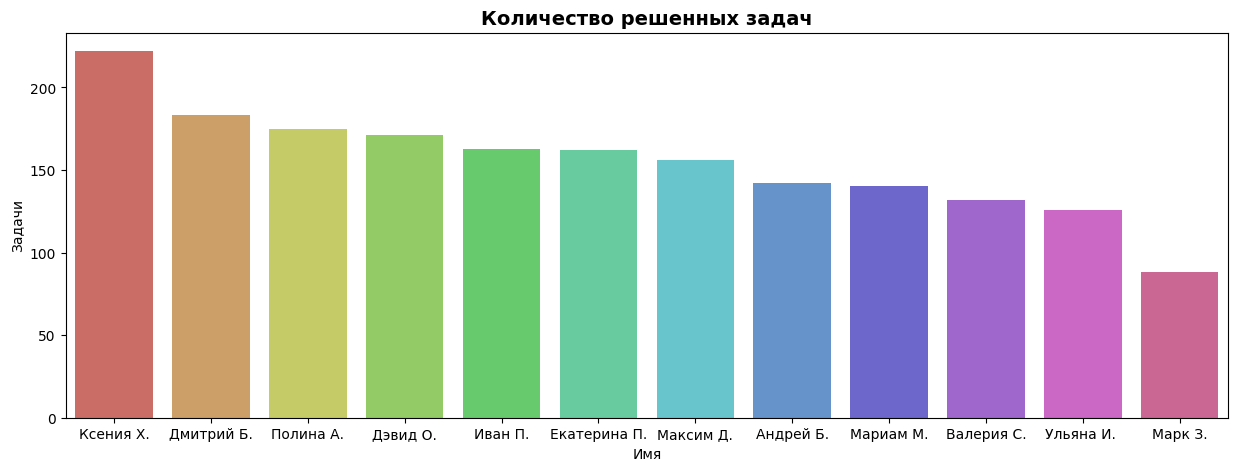

In [2]:
total_problems = an.total_problems(df).sort_values(ascending=False).reset_index(name="Задачи").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Количество решенных задач", weight="heavy", size=14)
sns.barplot(total_problems, x="Имя", y="Задачи", palette="hls", hue="Имя")
#plt.axhline(total_problems["Задачи"].mean())
plt.show()

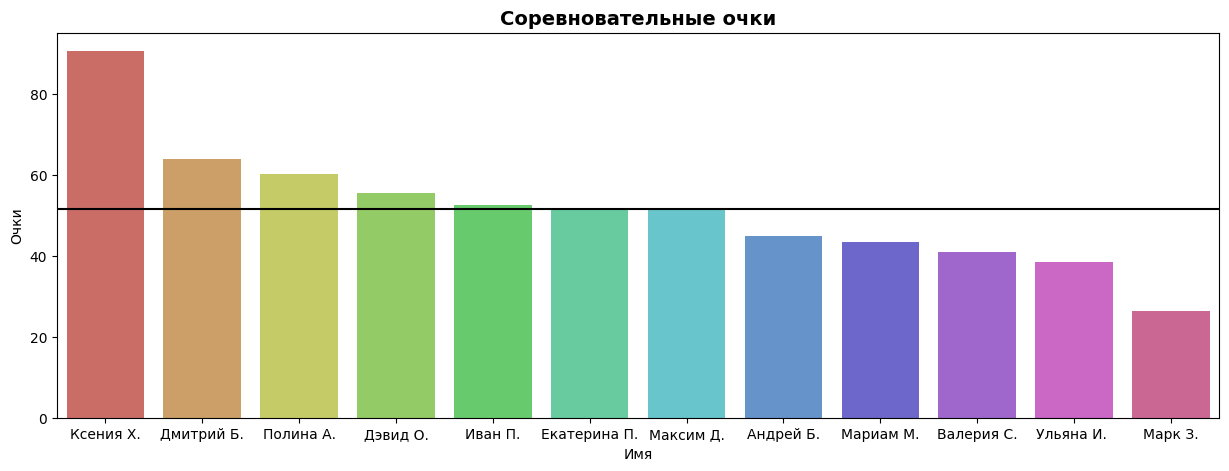

In [10]:
comp_points = an.competative_points(df, weight_func = "sqrt").sort_values(ascending=False).reset_index(name="Очки").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Соревновательные очки", weight="heavy", size=14)
sns.barplot(comp_points, x="Имя", y="Очки", palette="hls", hue="Имя")
plt.axhline(comp_points["Очки"].mean(), c="black")
#plt.axhline(total_problems["Задачи"].mean())
plt.show()

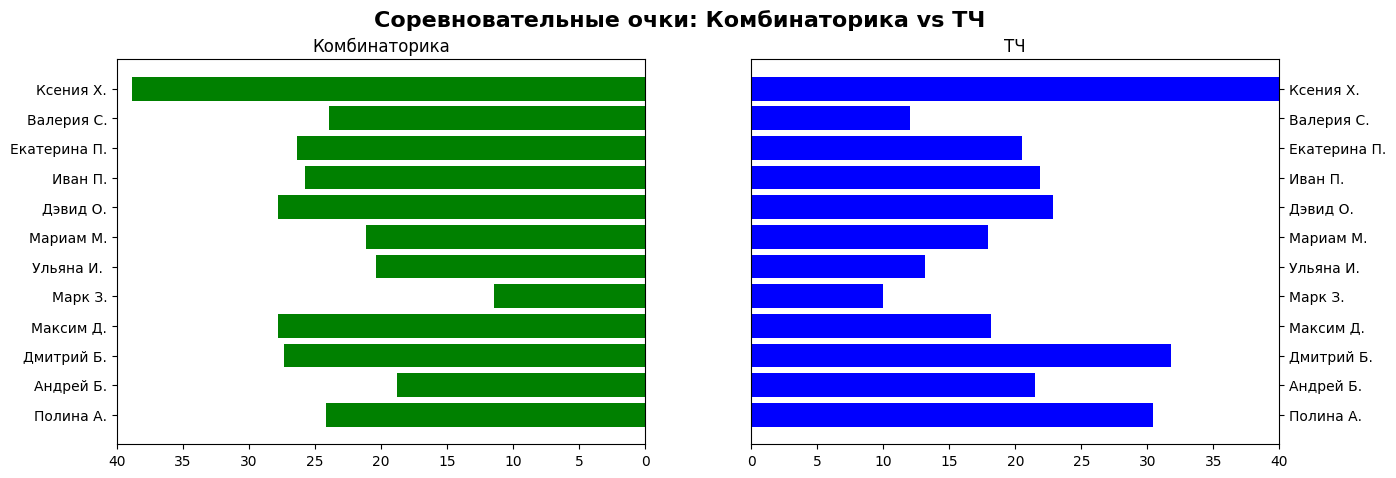

In [4]:
points_c = an.competative_points(df, topic='Комбинаторика', weight_func="sqrt")
points_t = an.competative_points(df, topic='ТЧ', weight_func="sqrt")

plt.figure(figsize=(15, 5))
plt.suptitle("Соревновательные очки: Комбинаторика vs ТЧ", size=16, weight='heavy')

plt.subplot(1, 2, 1)
plt.title("Комбинаторика")
plt.barh(points_t.index.tolist(), points_c, color='g')
plt.gca().set_xlim([40, 0])


plt.subplot(1, 2, 2)
plt.title("ТЧ")
plt.barh(points_t.index.tolist(), points_t, color='b')
plt.tick_params(axis='y', labelleft=False, labelright=True, left = False, right=True)
plt.gca().set_xlim([0, 40])



plt.show()

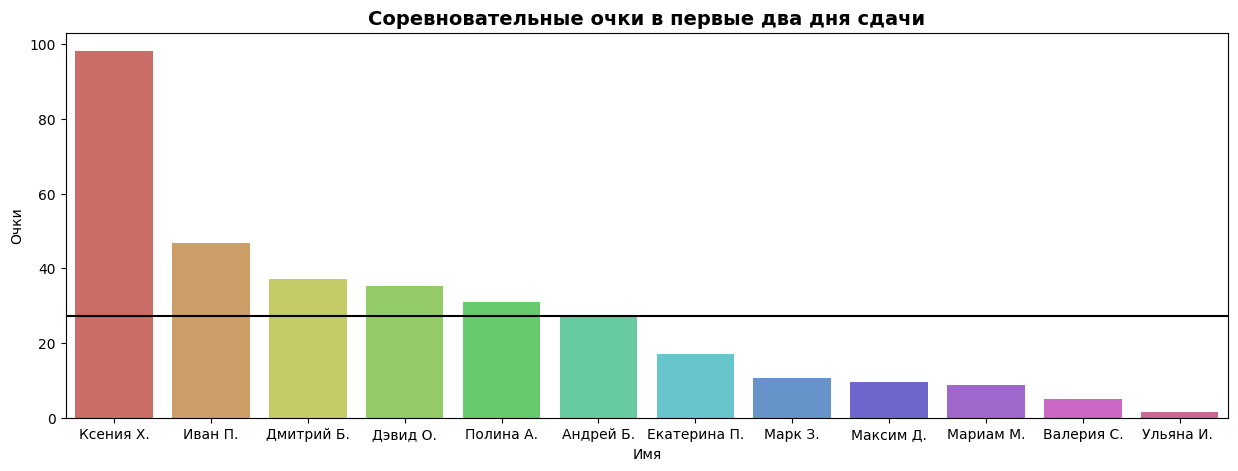

In [12]:
start_comp_points = an.competative_points(df, days=[1,2], weight_func='sigm').sort_values(ascending=False).reset_index(name="Очки").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Соревновательные очки в первые два дня сдачи", weight="heavy", size=14)
sns.barplot(start_comp_points, x="Имя", y="Очки", palette='hls', hue="Имя")
plt.axhline(start_comp_points["Очки"].mean(), c="black")
plt.show()

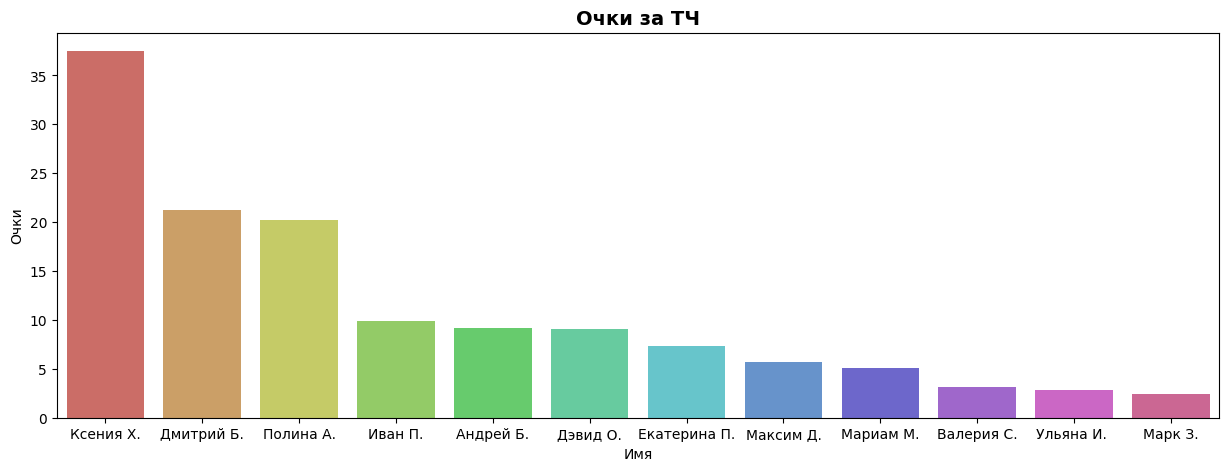

In [13]:
comp_points = an.competative_points(df, weight_func='sigm', topic="ТЧ").sort_values(ascending=False).reset_index(name="Очки").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Очки за ТЧ", weight="heavy", size=14)
sns.barplot(comp_points, x="Имя", y="Очки", palette='hls', hue="Имя")
#plt.axhline(comp_points["Очки"].mean())
plt.show()

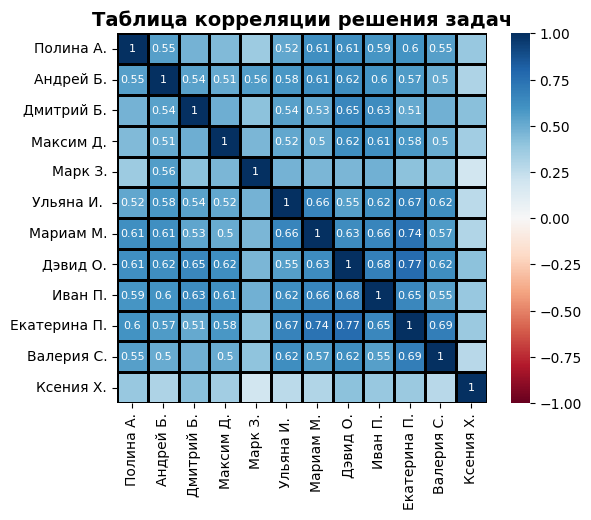

In [7]:
df1 = an.bin_conduit(an.topic_loc(df))
colormap = plt.cm.RdBu
ax = sns.heatmap(
    np.round(df1.corr(numeric_only=True), 2),
    linewidths=0.8,
    vmax=1.0,
    vmin = -1.0,
    square=True,
    cmap=colormap,
    linecolor="black",
    annot=True,
    annot_kws={"fontsize":8},
)

for i in ax.texts:
    if abs(float(i.get_text())) < 0.5:
        i.set_text("")

plt.title("Таблица корреляции решения задач", weight="heavy", size=14)

plt.show()